# Computer Vision 1: Assignment 1

Task 2

Group Number 43

Marek Drwal

## setup

In [59]:
import imageio
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

## read

In [60]:
img_pth = 'visual_attention_ds.png'

In [61]:
img = ski.io.imread(img_pth)

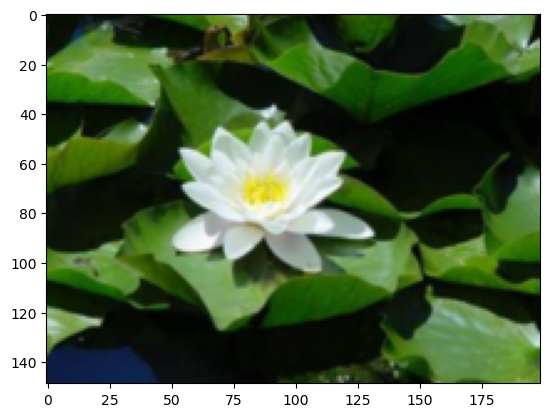

In [62]:
plt.imshow(img)

## convert

In [63]:
img = ski.color.rgba2rgb(img)

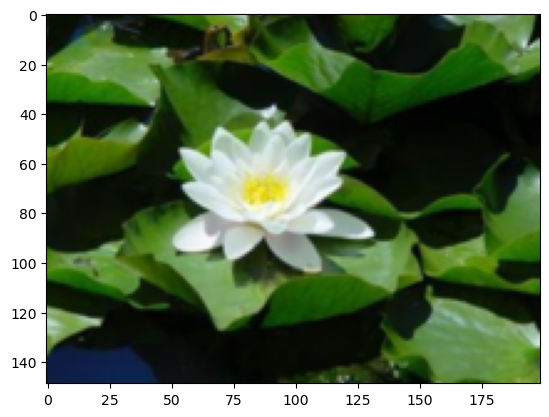

In [64]:
plt.imshow(img)

In [65]:
img = ski.color.rgb2gray(img)

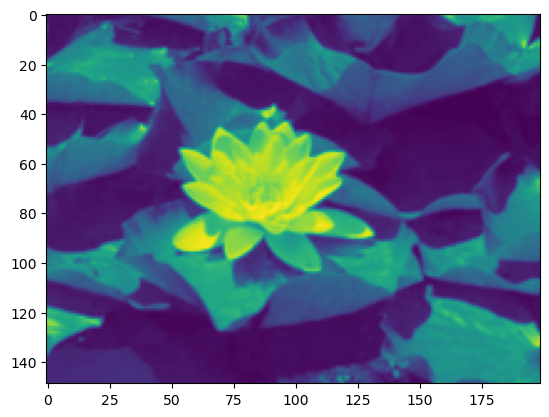

In [66]:
plt.imshow(img)

## conv 2

In [67]:
img = ski.io.imread(img_pth)

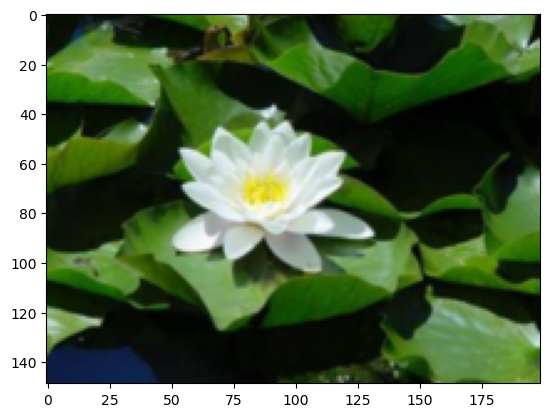

In [68]:
plt.imshow(img)

In [69]:
img2 = ski.color.rgba2rgb(img)

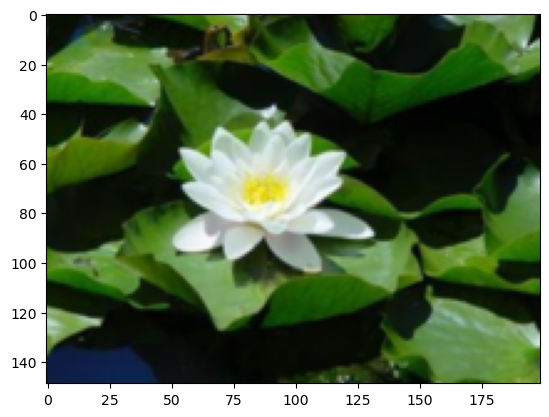

In [70]:
plt.imshow(img2)

In [71]:
img3 = ski.color.rgb2gray(img2)

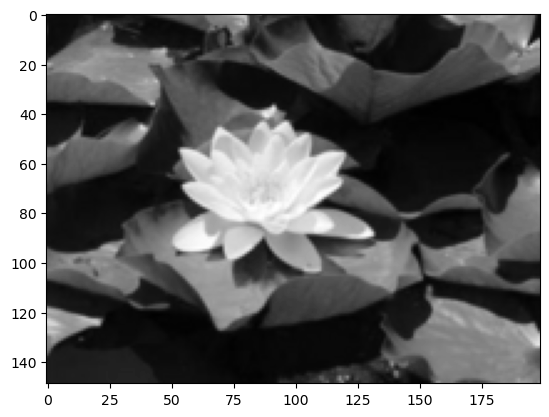

In [72]:
plt.imshow(img3, cmap=plt.cm.gray)

## integral img

In [73]:
ii = ski.transform.integral_image(img3)
ii

array([[1.07000000e-01, 1.65839216e-01, 2.21612157e-01, ...,
        5.68624933e+01, 5.70552933e+01, 5.70956557e+01],
       [2.00836471e-01, 3.22436471e-01, 4.38186667e-01, ...,
        1.09715171e+02, 1.10063788e+02, 1.10153472e+02],
       [2.80973725e-01, 4.55541961e-01, 6.22310196e-01, ...,
        1.59156518e+02, 1.59620038e+02, 1.59749511e+02],
       ...,
       [3.74655329e+01, 7.37578059e+01, 1.09155577e+02, ...,
        8.29938292e+03, 8.34052819e+03, 8.38045299e+03],
       [3.75783361e+01, 7.39873565e+01, 1.09502143e+02, ...,
        8.33716463e+03, 8.37879730e+03, 8.41921088e+03],
       [3.76880133e+01, 7.42100969e+01, 1.09842174e+02, ...,
        8.37276935e+03, 8.41487541e+03, 8.45581919e+03]])

In [74]:
ii.shape

(149, 199)

In [75]:
img3.shape

(149, 199)

In [76]:
c_size = 31
s_size = 51

In [77]:
s = np.zeros_like(img3)
c = np.zeros_like(img3)

In [78]:
s = c = 0

In [79]:
sc_img = np.zeros_like(img3)

In [80]:
y_dim, x_dim = img3.shape

In [81]:
for y in range(y_dim):
    for x in range(x_dim):
        st = (max(y-s_size, 0), max(x-s_size, 0))
        en = (min(y+s_size, y_dim-1), min(x+s_size, x_dim-1))
        s = ski.transform.integrate(ii, st, en)[0]
        
        st = (max(y-c_size, 0), max(x-c_size, 0))
        en = (min(y+c_size, y_dim-1), min(x+c_size, x_dim-1))
        c = ski.transform.integrate(ii, st, en)[0]

        sc_img[y][x] = s-c
        

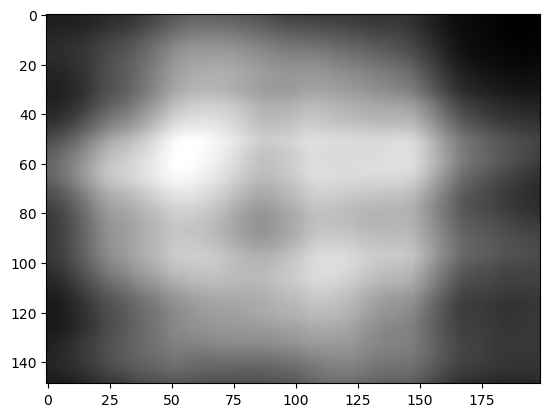

In [82]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## integration 2

In [83]:
sc_img = np.zeros_like(img3)

In [84]:
for y in range(y_dim):
    for x in range(x_dim):
        if x-s_size >= 0 and x+s_size < x_dim and y-s_size >= 0 and y+s_size < y_dim:
            st = (y-s_size, x-s_size)
            en = (y+s_size, x+s_size)
            s = ski.transform.integrate(ii, st, en)[0]

            st = (y-c_size, x-c_size)
            en = (y+c_size, x+c_size)
            c = ski.transform.integrate(ii, st, en)[0]

            sc_img[y][x] = s-c
        # else:
        #     sc_img[y][x] = img3[y][x]
        

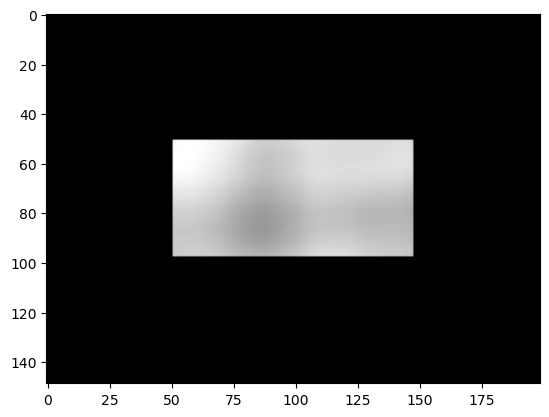

In [85]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## integration 3

In [86]:
sc_img = np.zeros_like(img3)

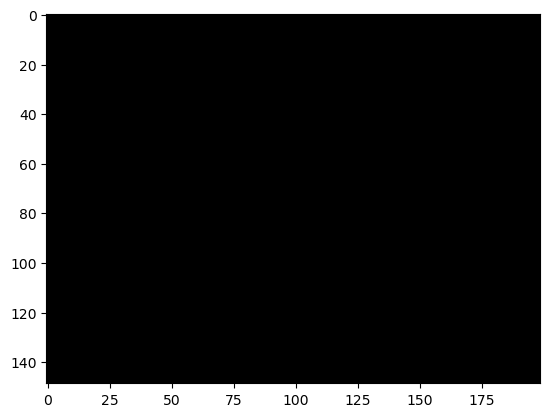

In [87]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## int4

In [88]:
ii = ski.transform.integral_image(img3)
ii

array([[1.07000000e-01, 1.65839216e-01, 2.21612157e-01, ...,
        5.68624933e+01, 5.70552933e+01, 5.70956557e+01],
       [2.00836471e-01, 3.22436471e-01, 4.38186667e-01, ...,
        1.09715171e+02, 1.10063788e+02, 1.10153472e+02],
       [2.80973725e-01, 4.55541961e-01, 6.22310196e-01, ...,
        1.59156518e+02, 1.59620038e+02, 1.59749511e+02],
       ...,
       [3.74655329e+01, 7.37578059e+01, 1.09155577e+02, ...,
        8.29938292e+03, 8.34052819e+03, 8.38045299e+03],
       [3.75783361e+01, 7.39873565e+01, 1.09502143e+02, ...,
        8.33716463e+03, 8.37879730e+03, 8.41921088e+03],
       [3.76880133e+01, 7.42100969e+01, 1.09842174e+02, ...,
        8.37276935e+03, 8.41487541e+03, 8.45581919e+03]])

In [89]:
ii.shape

(149, 199)

In [90]:
img3.shape

(149, 199)

In [91]:
c_size = 31
s_size = 51

In [92]:
s = np.zeros_like(img3)
c = np.zeros_like(img3)

In [93]:
s = c = 0

In [94]:
sc_img = np.zeros_like(img3)

In [95]:
y_dim, x_dim = img3.shape

In [96]:
for y in range(y_dim):
    for x in range(x_dim):
        st = (max(y-s_size-1, 0), max(x-s_size-1, 0))
        en = (min(y+s_size+1, y_dim-1), min(x+s_size+1, x_dim-1))
        s = ski.transform.integrate(ii, st, en)[0]
        
        st = (max(y-c_size-1, 0), max(x-c_size-1, 0))
        en = (min(y+c_size+1, y_dim-1), min(x+c_size+1, x_dim-1))
        c = ski.transform.integrate(ii, st, en)[0]

        sc_img[y][x] = s-c
        

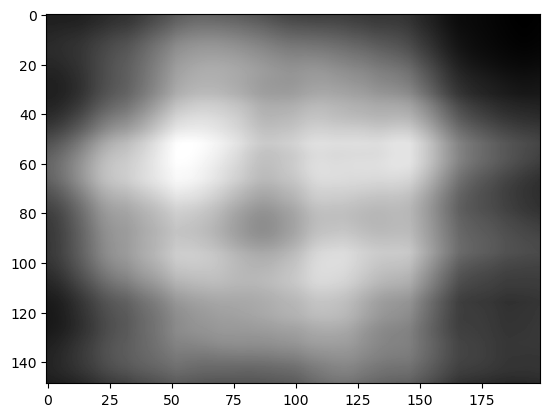

In [97]:
plt.imshow(sc_img, cmap=plt.cm.gray)

## int5

In [98]:
c_size = 31-1
s_size = 51-1

In [99]:
sc_img = np.zeros_like(img3)

In [100]:
for y in range(y_dim):
    for x in range(x_dim):
        if x-s_size >= 0 and x+s_size < x_dim and y-s_size >= 0 and y+s_size < y_dim:
            st = (y-s_size, x-s_size)
            en = (y+s_size, x+s_size)
            s = ski.transform.integrate(ii, st, en)[0]

            st = (y-c_size, x-c_size)
            en = (y+c_size, x+c_size)
            c = ski.transform.integrate(ii, st, en)[0]

            sc_img[y][x] = s-c
        # else:
        #     sc_img[y][x] = img3[y][x]
        

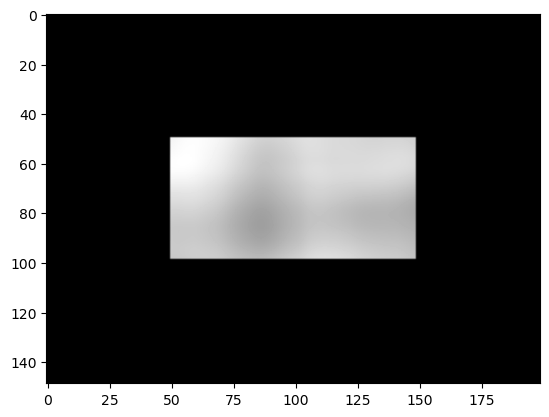

In [101]:
plt.imshow(sc_img, cmap=plt.cm.gray)